In [25]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="ticks", color_codes=True)

ROOT_DIR = '../data/'
CLASSES = {
    'c0': 'safe driving',
    'c1': 'texting\nright',
    'c2': 'talking on the phone\nright',
    'c3': 'texting\nleft',
    'c4': 'talking on the phone\nleft',
    'c5': 'operating the radio',
    'c6': 'drinking',
    'c7': 'reaching behind',
    'c8': 'hair and makeup',
    'c9': 'talking to passenger'
}

Let's first read the data

In [26]:
df = pd.read_csv(os.path.join(ROOT_DIR, 'driver_imgs_list.csv'))
df['classname'] = df.classname.map(CLASSES)

And visualize the first 5 rows

In [27]:
df.head()

,subject,classname,img
0,p002,safe driving,img_44733.jpg
1,p002,safe driving,img_72999.jpg
2,p002,safe driving,img_25094.jpg
3,p002,safe driving,img_69092.jpg
4,p002,safe driving,img_92629.jpg


## Driver's analysis

In [4]:
print(f"num drivers: {df.subject.nunique()}")

num drivers: 26


Let's see how many images per driver we have 

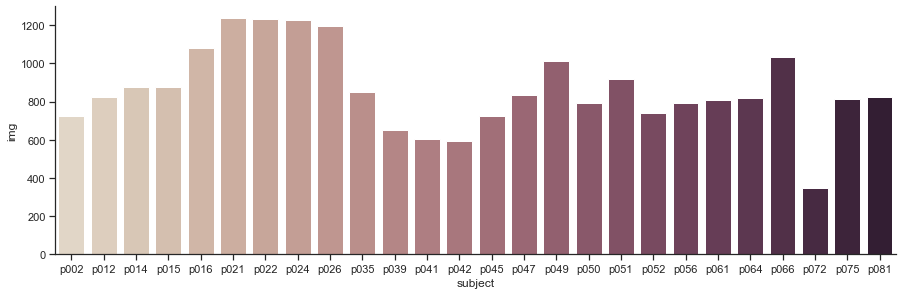

In [5]:
images_by_driver = df.groupby('subject').count().reset_index()
sns.catplot(x='subject', y='img', kind='bar', palette="ch:.25", height=4.27, aspect=12.7/4.27, data=images_by_driver)

In [6]:
print(f"Average num images: {round(images_by_driver.img.mean(), 2)}")
print(f"Standard Deviation: {round(images_by_driver.img.std(), 2)}")
print(f"Max num images: {images_by_driver.img.max()}")
print(f"Min num images: {images_by_driver.img.min()}")

Average num images: 862.46
Standard Deviation: 214.3
Max num images: 1237
Min num images: 346


# Class analysis

In [7]:
print(f"num classes: {df.classname.nunique()}")

num classes: 10


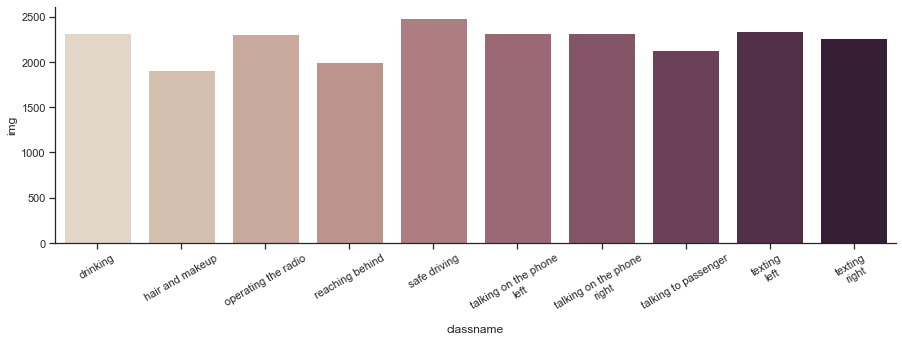

In [8]:
images_by_class = df.groupby('classname').count().reset_index()
chart = sns.catplot(x='classname', y='img', kind='bar', palette="ch:.25", height=4.27, aspect=12.7/4.27, data=images_by_class)
chart.set_xticklabels(rotation=30)

In [9]:
print(f"Average num images: {round(images_by_class.img.mean(), 2)}")
print(f"Standard Deviation: {round(images_by_class.img.std(), 2)}")
print(f"Max num images: {images_by_class.img.max()}")
print(f"Min num images: {images_by_class.img.min()}")

Average num images: 2242.4
Standard Deviation: 175.39
Max num images: 2489
Min num images: 1911


Using a Heatmap we can spot particular distribution between classes and drivers

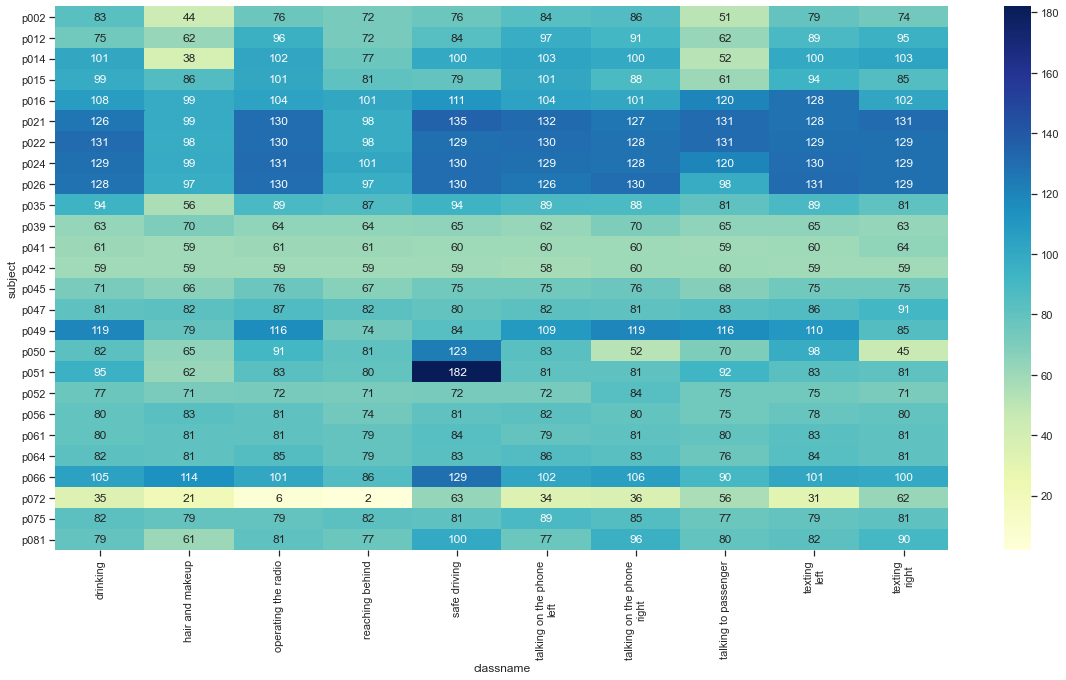

In [10]:
heatmap_df = df.groupby(['subject', 'classname']).count().reset_index()
# pandas pivot
heatmap_data = pd.pivot_table(heatmap_df, values='img', 
                     index=['subject'], 
                     columns='classname')
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")

In [11]:
images_by_driver.head()

,subject,classname,img
0,p002,725,725
1,p012,823,823
2,p014,876,876
3,p015,875,875
4,p016,1078,1078


In [12]:
train_drivers = ['p035', 'p039', 'p041', 'p042', 'p045', 'p047', 'p049', 'p050', 
                 'p051', 'p052', 'p056', 'p061', 'p064', 'p066', 'p072','p075', 'p081']
val_drivers = [ 'p021', 'p022', 'p024','p026']
test_drivers = ['p002', 'p012', 'p014', 'p015', 'p016']

In [13]:
def compute_share(drivers, df=images_by_driver):
    return df[df.subject.isin(drivers)].img.sum() / df.img.sum()

print(f"Train: {compute_share(train_drivers)}")
print(f"Validation: {compute_share(val_drivers)}")
print(f"Test: {compute_share(test_drivers)}")

Train: 0.5866482340349626
Validation: 0.2181591152336782
Test: 0.19519265073135925


# Sample the data

In [230]:
NUM_IMAGES = 20
VAL_IMAGES = 5

grouped_df = df.groupby(['subject', 'classname'])
# consider only groups with at least NUM_IMAGES images
grouped_df = grouped_df.filter(lambda x: x.img.count()>NUM_IMAGES ) 

In [231]:
sampled_df = grouped_df\
                .groupby(['subject', 'classname'])\
                .apply(lambda x: x.sample(NUM_IMAGES))\
                .reset_index(drop=True)

In [232]:
val_df = sampled_df\
                .groupby(['subject', 'classname'])\
                .apply(lambda x: x.sample(VAL_IMAGES))\
                .reset_index(drop=True)

In [233]:
train_df = pd.concat([sampled_df, val_df]).drop_duplicates(keep=False)

In [239]:
print(train_df.shape, val_df.shape, sampled_df.shape)
assert set(train_df.img.to_list()) & set(val_df.img.to_list()) == set()

(3870, 3) (1290, 3) (5160, 3)
